# Лабораторная работа 4

> =========================================
>
> Тема: Плотные нейронные сети
>
> Набор данных: Данные владельцев кредитных карт
>
> Студент: Цветков Иван ИУ7-22М
> 
>=========================================

## 0. Импорты

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## 1. Данные

### 1.1. Чтение

In [2]:
pd.set_option('display.max_columns', None)

dfInit = pd.read_csv('./data/Credit_card.csv', delimiter=',', encoding='utf8')
del dfInit["Ind_ID"]


df = dfInit.copy(deep=True)

df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


### 1.2. Преобразование

In [3]:
def updateData(fieldName):
  dataDf = list(set(df[fieldName].map(lambda elem: elem)))

  cnt = 0
  dataDict = {}
  for shape in dataDf:
    if shape not in dataDict.keys():
      dataDict[shape] = cnt
      cnt += 1
  print(f"{fieldName} = {dataDict}\n")

  df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [4]:
df.dropna(axis=0, inplace=True)

del df["Mobile_phone"]
del df["Work_Phone"]
del df["Phone"]
del df["EMAIL_ID"]

updateData(fieldName="GENDER")
updateData(fieldName="Car_Owner")
updateData(fieldName="Propert_Owner")
updateData(fieldName="Type_Income")
updateData(fieldName="EDUCATION")
updateData(fieldName="Marital_status")
updateData(fieldName="Housing_type")
updateData(fieldName="Type_Occupation")

df

GENDER = {'M': 0, 'F': 1}

Car_Owner = {'Y': 0, 'N': 1}

Propert_Owner = {'Y': 0, 'N': 1}

Type_Income = {'Working': 0, 'Pensioner': 1, 'State servant': 2, 'Commercial associate': 3}

EDUCATION = {'Lower secondary': 0, 'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3}

Marital_status = {'Single / not married': 0, 'Civil marriage': 1, 'Widow': 2, 'Separated': 3, 'Married': 4}

Housing_type = {'Rented apartment': 0, 'Municipal apartment': 1, 'With parents': 2, 'House / apartment': 3, 'Co-op apartment': 4, 'Office apartment': 5}

Type_Occupation = {'Drivers': 0, 'Core staff': 1, 'Realty agents': 2, 'IT staff': 3, 'Waiters/barmen staff': 4, 'Sales staff': 5, 'Laborers': 6, 'Security staff': 7, 'Accountants': 8, 'High skill tech staff': 9, 'Secretaries': 10, 'Cleaning staff': 11, 'HR staff': 12, 'Low-skill Laborers': 13, 'Medicine staff': 14, 'Managers': 15, 'Cooking staff': 16, 'Private service staff': 17}



,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
8,0,0,0,1,450000.0,3,1,4,3,-18173.0,-678,1,3
9,0,0,0,1,450000.0,1,1,4,3,-18173.0,-678,1,3
10,0,0,0,1,450000.0,3,1,0,3,-18173.0,-678,1,1
11,1,0,0,0,90000.0,0,1,4,3,-18950.0,-1002,16,2
13,1,0,0,0,90000.0,0,1,4,3,-18950.0,-1002,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1,0,0,1,144000.0,0,2,4,3,-12903.0,-2924,8,3
1542,0,0,1,1,360000.0,2,1,4,3,-11294.0,-3536,0,3
1544,1,1,1,0,225000.0,3,3,0,3,-10229.0,-1209,8,1
1545,0,0,0,2,180000.0,0,2,4,3,-13174.0,-2477,15,4


## 2. Выполнение

### 2.1. Разделение на обучающие и тестовые данные


In [5]:
x = df.drop(['GENDER'], axis=1)
y = df['GENDER']

xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTrainingTransf = scaler.transform(xTraining)
xTestTransf = scaler.transform(xTest)

### 2.2. Многослойный перцептрон

In [7]:
def calculateAccuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainingTransf, yTraining)
    return mlpcClf.score(xTestTransf, yTest)

### 2.3. Количество нейронов на 1 уровне

In [8]:
hiddenLayerSizeArr = [(60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)]

# activation=relu, solver=lbfgs, max_iter=200

for layerSize in hiddenLayerSizeArr:
    mlpcClf = MLPClassifier(
        solver='lbfgs',
        hidden_layer_sizes=layerSize, 
        early_stopping=True,
        random_state=42
    )
    
    print('layerSize={0}, accuracy={1}'.format(layerSize, calculateAccuracy(mlpcClf)))

layerSize=(60,), accuracy=0.75
layerSize=(100,), accuracy=0.7012987012987013
layerSize=(150,), accuracy=0.711038961038961
layerSize=(200,), accuracy=0.724025974025974
layerSize=(250,), accuracy=0.6948051948051948
layerSize=(350,), accuracy=0.7402597402597403
layerSize=(500,), accuracy=0.7467532467532467
layerSize=(750,), accuracy=0.7142857142857143
layerSize=(1000,), accuracy=0.7435064935064936


### 2.4. Оптимизатор

In [9]:
solverArr = ['lbfgs', 'sgd', 'adam']

# activation=relu, max_iter=200
# 'lbfgs' -- для маленьких датасетов
# 'sgd' -- стохастический градиентный спуск
# 'adam' -- для больших датасетов

for solver in solverArr:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(150,),
        early_stopping=True,
        random_state=42
    )
    
    print('solver={0}, accuracy={1}'.format(solver, calculateAccuracy(mlpcClf)))

solver=lbfgs, accuracy=0.711038961038961
solver=sgd, accuracy=0.6298701298701299
solver=adam, accuracy=0.7012987012987013


### 2.5. Функция активации

In [10]:
fArr = ['identity', 'logistic', 'tanh', 'relu']

# max_iter=200

for f in fArr:
    mlpcClf = MLPClassifier(
        activation=f,
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42
    )
    
    print('f={0}, accuracy={1}'.format(f, calculateAccuracy(mlpcClf)))

f=identity, accuracy=0.698051948051948
f=logistic, accuracy=0.737012987012987
f=tanh, accuracy=0.6948051948051948
f=relu, accuracy=0.711038961038961


### 2.6. Число итераций

In [11]:
iterArr = [200, 500, 700, 1000]

for iter in iterArr:
    mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=iter
    )
    
    print('max_iter={0}, accuracy={1}'.format(iter, calculateAccuracy(mlpcClf)))

max_iter=200, accuracy=0.711038961038961
max_iter=500, accuracy=0.711038961038961
max_iter=700, accuracy=0.711038961038961
max_iter=1000, accuracy=0.711038961038961


### 2.7. Итоговый результат

In [12]:
mlpcClf = MLPClassifier(
    activation='relu',
    solver='lbfgs',
    hidden_layer_sizes=(200,), 
    early_stopping=True,
    random_state=42,
    max_iter=200
)

print('accuracy={0}'.format(calculateAccuracy(mlpcClf)))

accuracy=0.724025974025974


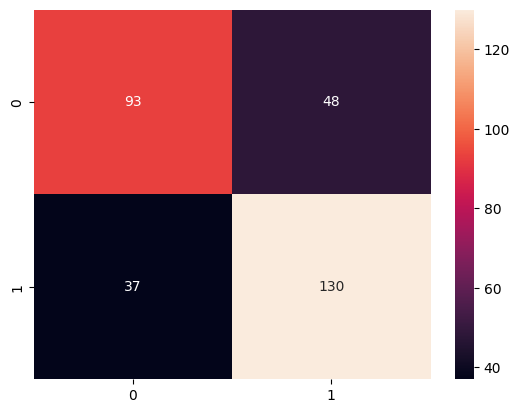

In [13]:
classes_names = ['0','1']
cm = pd.DataFrame(
    confusion_matrix(yTest, mlpcClf.predict(xTestTransf)), 
    columns=classes_names, 
    index=classes_names
)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()